# <font color='black'> HomeWork-5
Netid: sbhamid2</font>

__Your goal is to add the following three things to your implementation of the REINFORCE algorithm and to quantify the impact of these things when training an agent for the grid_world environment:__

__Importance sampling: REINFORCE is an on-policy algorithm. Importance sampling can be used to produce an off-policy variant of this algorithm. The benefits of using off-policy learning in policy gradient methods are similar to those you discovered in the context of value function methods with "experience replay." Keep a history of trajectories (with log-probabilities and rewards) and choose a subset of them for mini-batch training at each step of REINFORCE.__

__Causality: REINFORCE depends on having a good estimate of the policy gradient. This estimate is obtained by computing a sample mean - the average gradient over some number of sampled trajectories. If the variance of the gradient is high, then many samples are required to obtain a good estimate of the mean. One way to reduce the variance is to eliminate any term in the gradient whose mean is known to be identically zero. (If you know a quantity is zero in expectation, why estimate it?) The idea of "causality" is that the reward at a given time should not - in expectation - depend on actions taken at any later time. Modify your computation of the gradient to eliminate terms that are zero due to "causality."__

__Baseline shift: It is possible to show that the gradient of J(theta) and the gradient of J(theta) - b have the same mean for any b but can have different variance. "Baseline shift" means choosing b to minimize the variance. Modify your computation of the gradient to incorporate baseline shift. Remember that b is chosen element-wise - a different value of b is best for each component of theta.__

__Apply REINFORCE with these three changes to your grid_world example from HW1. As before, choose hyperparameters so that the training converges. Test your algorithm on both the "easy" version of grid_world (actions deterministically move the agent) and the "hard" version (some probability of moving in a direction different to the desired action).__

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from gridworld.gridworld import GridWorldEnvNew
import reinforce as re

myenv = gym.make('MyGridworld-v2')
set_params = {}
myenv.seed(543)

[543]

In [2]:
##### Results are shown for easy version, can be changed to hard version as well here
myenv.env.version = 'easy' #'hard'

__Compare the learning speed (number of episodes) to your implementation of REINFORCE from last week. Do the three changes result in faster or slower convergence? Do they result in a better agent?__

In [3]:
## Plotting the learning curves of REINFORCE learning
set_params.update({'no_eps': 500, 'eps_len': 100, 'alpha': 0.05, 'batch_size': 50, 'mem_size': 75, 'algo': 'bci'})
agentA = re.REINFORCElearning(myenv)
pfuncA, rewardA, gradA = agentA.train(set_params)

Version:  easy
Executing Baseline
Executing Causality
Executing Importance Sampling
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9


In [4]:
## Plotting the learning curves of REINFORCE learning
set_params.update({'no_eps': 500, 'eps_len': 100, 'alpha': 0.05, 'batch_size': 50, 'mem_size': 75, 'algo': 'd'})
agentB = re.REINFORCElearning(myenv)
pfuncB, rewardB, gradB = agentB.train(set_params)

Version:  easy
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9


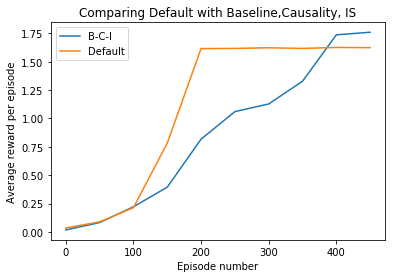

In [40]:
plt.plot(np.arange(int(agentA.no_eps/float(agentA.batch_size)))*agentA.batch_size, rewardA, label='B-C-I')
plt.plot(np.arange(int(agentB.no_eps/float(agentB.batch_size)))*agentB.batch_size, rewardB, label='Default')
plt.legend()
plt.ylabel('Average reward per episode')
plt.xlabel('Episode number')
plt.title('Comparing Default with Baseline,Causality, IS')
plt.show()

__Also, compare the sample variance of the policy gradient. Verify that "causality" and "baseline shift" reduce the sample variance. (Does importance sampling have an effect on the sample variance?)__

In [10]:
## Plotting the learning curves of REINFORCE learning Including Causality
set_params.update({'no_eps': 500, 'eps_len': 100, 'alpha': 0.05, 'batch_size': 50, 'mem_size': 75, 'algo': 'c'})
agentC = re.REINFORCElearning(myenv)
pfuncC, rewardC, gradC = agentC.train(set_params)

Version:  easy
Executing Causality
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9


In [11]:
## Plotting the learning curves of REINFORCE learning Including Baseline Shift
set_params.update({'no_eps': 500, 'eps_len': 100, 'alpha': 0.05, 'batch_size': 50, 'mem_size': 75, 'algo': 'b'})
agentD = re.REINFORCElearning(myenv)
pfuncD, rewardD, gradD = agentD.train(set_params)

Version:  easy
Executing Baseline
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9


In [19]:
gradB_3d = np.dstack(gradB.values())
gradC_3d = np.dstack(gradC.values())
gradD_3d = np.dstack(gradD.values())
print('Lower average variance by using Baseline shift and causality')
print('Vanilla:', np.mean(np.var(gradB_3d, axis=-1)))
print('Causality:', np.mean(np.var(gradC_3d, axis=-1)))
print('Baseline Shift:', np.mean(np.var(gradD_3d, axis=-1)))

Average variance in last batch of samples
Vanilla: 546968.883838
Causality: 135902.198958
Baseline Shift: 84426.8326969


__Include an ablation study in your analysis, where you test the algorithm three times, with one feature removed each time (e.g., with only importance sampling and baseline shift), to quantify the impact of this feature on performance.__

In [6]:
## Plotting the learning curves of REINFORCE learning Including Causality
set_params.update({'no_eps': 500, 'eps_len': 100, 'alpha': 0.05, 'batch_size': 50, 'mem_size': 75, 'algo': 'bc'})
agentE = re.REINFORCElearning(myenv)
pfuncE, rewardE, gradE = agentE.train(set_params)

Version:  easy
Executing Baseline
Executing Causality
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9


In [7]:
## Plotting the learning curves of REINFORCE learning Including Causality
set_params.update({'no_eps': 500, 'eps_len': 100, 'alpha': 0.05, 'batch_size': 50, 'mem_size': 75, 'algo': 'bi'})
agentF = re.REINFORCElearning(myenv)
pfuncF, rewardF, gradF = agentF.train(set_params)

Version:  easy
Executing Baseline
Executing Importance Sampling
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9


In [8]:
## Plotting the learning curves of REINFORCE learning Including Causality
set_params.update({'no_eps': 500, 'eps_len': 100, 'alpha': 0.05, 'batch_size': 50, 'mem_size': 75, 'algo': 'ci'})
agentG = re.REINFORCElearning(myenv)
pfuncG, rewardG, gradG = agentG.train(set_params)

Version:  easy
Executing Causality
Executing Importance Sampling
Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9


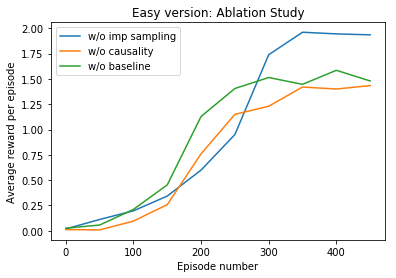

In [39]:
plt.plot(np.arange(int(agentE.no_eps/float(agentE.batch_size)))*agentE.batch_size, rewardE, label='w/o imp sampling')
plt.plot(np.arange(int(agentF.no_eps/float(agentF.batch_size)))*agentF.batch_size, rewardF, label='w/o causality')
plt.plot(np.arange(int(agentG.no_eps/float(agentG.batch_size)))*agentG.batch_size, rewardG, label='w/o baseline')
plt.legend()
plt.ylabel('Average reward per episode')
plt.xlabel('Episode number')
plt.title('Easy version: Ablation Study')
plt.show()